# Simple GAN 

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import torchvision
import torchvision.transforms as transforms

In [3]:
# Import some data

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])
    
batch_size = 128
# Load the training set
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Create a batched data loader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

C:\Users\mhart\anaconda\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


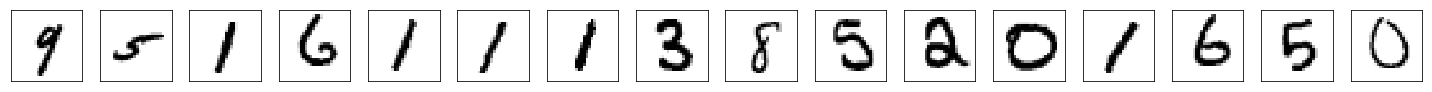

In [4]:
fig = plt.figure(figsize=(20,5))
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(1, 16, i+1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()  

In [5]:
img_rows = 28
img_cols = 28
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
cols = 3
rows = 3
z_dim = 10
Z_examples = torch.rand((cols*rows,z_dim)) # latent vectors used to generate samples

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            #nn.Linear(z_dim,128),
            #nn.LeakyReLU(), # Leaky ReLU
            #nn.Linear(128,img_rows*img_cols),
            #nn.Tanh(), # Output layer with tanh activation
            nn.Linear(z_dim,7*7), # create 7x7 images
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7,7*7*2),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7*2,7*7*4),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7*4,7*7*8),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7*8,7*7*16),
            nn.Tanh()
        )
    def forward(self,x):
        output = self.model(x)
        output = output.view(x.shape[0],channels,img_rows,img_cols)
        return output
    
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            #nn.Flatten(),
            #nn.Linear(img_rows*img_cols*channels,128),
            #nn.LeakyReLU(),
            #nn.Linear(128,1),
            #nn.Sigmoid(),
            nn.Flatten(),
            nn.Linear(img_rows*img_cols*channels,7*7*8),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7*8,7*7*4),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7*4,7*7*2),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7*2,7*7),
            nn.LeakyReLU(negative_slope = 0.2),
            nn.Dropout(0.3),
            nn.Linear(7*7,1)
        )
    def forward(self,x):
        #inp = x.view(x.shape[0],img_rows*img_cols*channels)
        output = self.model(x)
        return output

In [7]:
generator = Generator()
discriminator = Discriminator()
print(discriminator)

Discriminator(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=392, bias=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=392, out_features=196, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=196, out_features=98, bias=True)
    (8): LeakyReLU(negative_slope=0.2)
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=98, out_features=49, bias=True)
    (11): LeakyReLU(negative_slope=0.2)
    (12): Dropout(p=0.3, inplace=False)
    (13): Linear(in_features=49, out_features=1, bias=True)
  )
)


In [8]:
# hyper-parameters
lr = 0.002 #1e-4
num_epochs = 200
sample_interval = 5
loss_function = nn.HingeEmbeddingLoss()  # nn.BCELoss() # binary cross entropy
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr = lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr = lr)

Epoch 0
Discriminator loss tensor(-1.0828e+12, grad_fn=<MeanBackward0>)
Generator loss tensor(-2.7119e+12, grad_fn=<MeanBackward0>)


C:\Users\mhart\anaconda\lib\site-packages\matplotlib\legend.py:937: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\mhart\anaconda\lib\site-packages\matplotlib\legend.py:937: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\mhart\anaconda\lib\site-packages\matplotlib\legend.py:937: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\mhart\anaconda\lib\site-p

Epoch 1
Discriminator loss tensor(-4.1056e+13, grad_fn=<MeanBackward0>)
Generator loss tensor(-1.0174e+14, grad_fn=<MeanBackward0>)
Epoch 2
Discriminator loss tensor(-2.7334e+14, grad_fn=<MeanBackward0>)
Generator loss tensor(-7.1084e+14, grad_fn=<MeanBackward0>)
Epoch 3
Discriminator loss tensor(-1.0077e+15, grad_fn=<MeanBackward0>)
Generator loss tensor(-2.6596e+15, grad_fn=<MeanBackward0>)
Epoch 4
Discriminator loss tensor(-2.6772e+15, grad_fn=<MeanBackward0>)
Generator loss tensor(-6.8784e+15, grad_fn=<MeanBackward0>)
Epoch 5
Discriminator loss tensor(-5.9386e+15, grad_fn=<MeanBackward0>)
Generator loss tensor(-1.4550e+16, grad_fn=<MeanBackward0>)
Epoch 6
Discriminator loss tensor(-1.0855e+16, grad_fn=<MeanBackward0>)
Generator loss tensor(-2.7291e+16, grad_fn=<MeanBackward0>)
Epoch 7
Discriminator loss tensor(-1.8655e+16, grad_fn=<MeanBackward0>)
Generator loss tensor(-4.8960e+16, grad_fn=<MeanBackward0>)
Epoch 8
Discriminator loss tensor(-2.9326e+16, grad_fn=<MeanBackward0>)
Gene

C:\Users\mhart\anaconda\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch 20
Discriminator loss tensor(-7.5537e+17, grad_fn=<MeanBackward0>)
Generator loss tensor(-1.9629e+18, grad_fn=<MeanBackward0>)
Epoch 21
Discriminator loss tensor(-9.0416e+17, grad_fn=<MeanBackward0>)
Generator loss tensor(-2.2799e+18, grad_fn=<MeanBackward0>)
Epoch 22
Discriminator loss tensor(-1.0886e+18, grad_fn=<MeanBackward0>)
Generator loss tensor(-2.7438e+18, grad_fn=<MeanBackward0>)
Epoch 23
Discriminator loss tensor(-1.2401e+18, grad_fn=<MeanBackward0>)
Generator loss tensor(-3.2571e+18, grad_fn=<MeanBackward0>)
Epoch 24
Discriminator loss tensor(-1.4317e+18, grad_fn=<MeanBackward0>)
Generator loss tensor(-3.8335e+18, grad_fn=<MeanBackward0>)
Epoch 25
Discriminator loss tensor(-1.6749e+18, grad_fn=<MeanBackward0>)
Generator loss tensor(-4.4552e+18, grad_fn=<MeanBackward0>)
Epoch 26
Discriminator loss tensor(-1.9424e+18, grad_fn=<MeanBackward0>)
Generator loss tensor(-5.0784e+18, grad_fn=<MeanBackward0>)
Epoch 27
Discriminator loss tensor(-2.2805e+18, grad_fn=<MeanBackward

Generator loss tensor(-4.5479e+20, grad_fn=<MeanBackward0>)
Epoch 82
Discriminator loss tensor(-1.8275e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-4.6839e+20, grad_fn=<MeanBackward0>)
Epoch 83
Discriminator loss tensor(-1.9326e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-5.1714e+20, grad_fn=<MeanBackward0>)
Epoch 84
Discriminator loss tensor(-2.0959e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-5.4027e+20, grad_fn=<MeanBackward0>)
Epoch 85
Discriminator loss tensor(-2.2704e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-5.6586e+20, grad_fn=<MeanBackward0>)
Epoch 86
Discriminator loss tensor(-2.2075e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-5.7781e+20, grad_fn=<MeanBackward0>)
Epoch 87
Discriminator loss tensor(-2.3263e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-6.2346e+20, grad_fn=<MeanBackward0>)
Epoch 88
Discriminator loss tensor(-2.5495e+20, grad_fn=<MeanBackward0>)
Generator loss tensor(-6.5613e+20, grad_fn=<MeanBackward0>)
Epoch 89


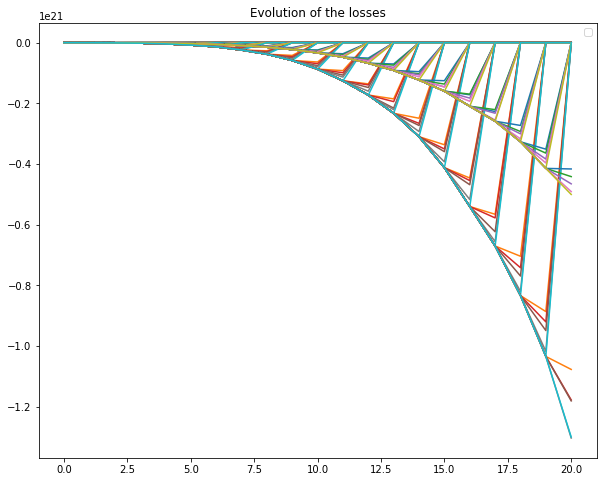

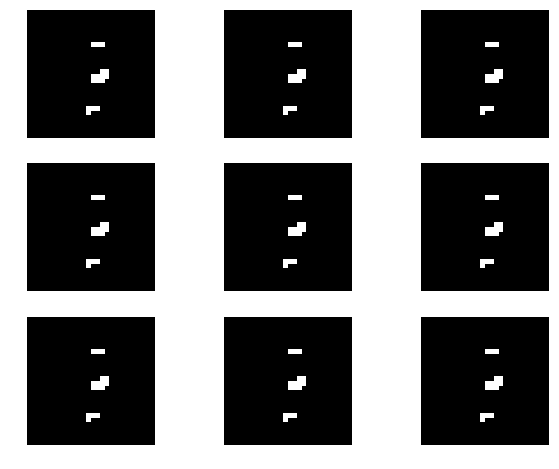

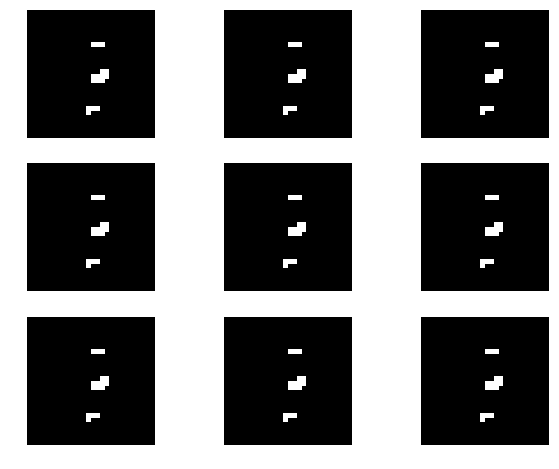

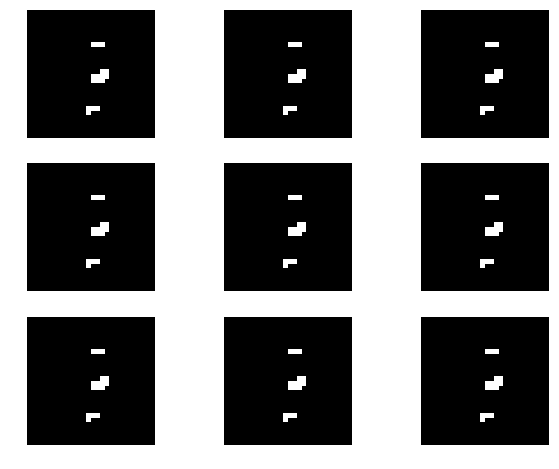

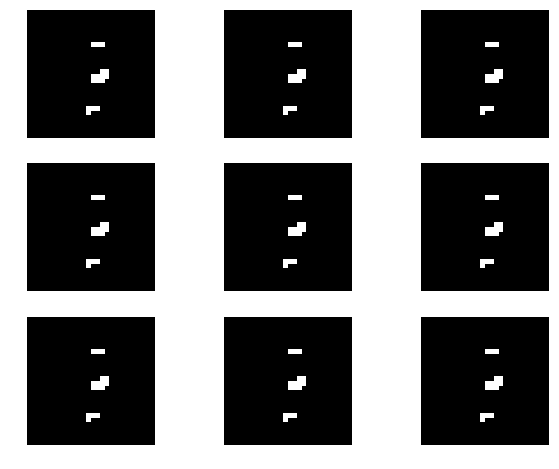

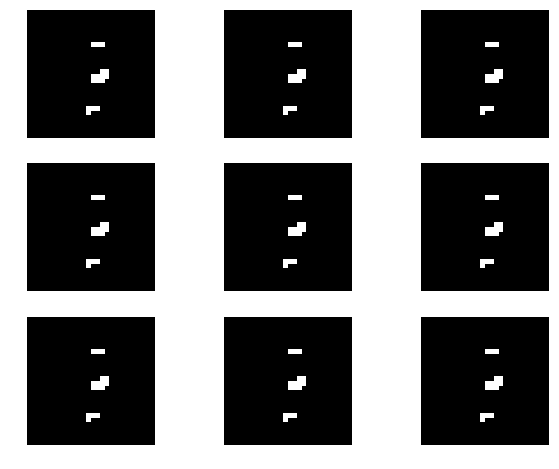

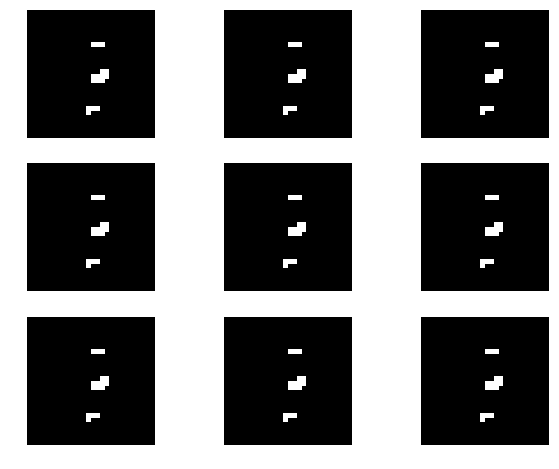

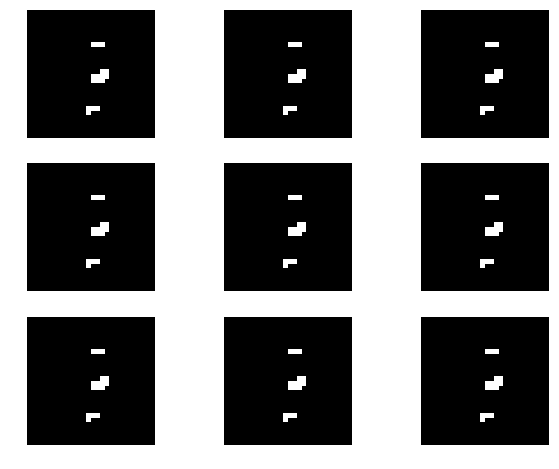

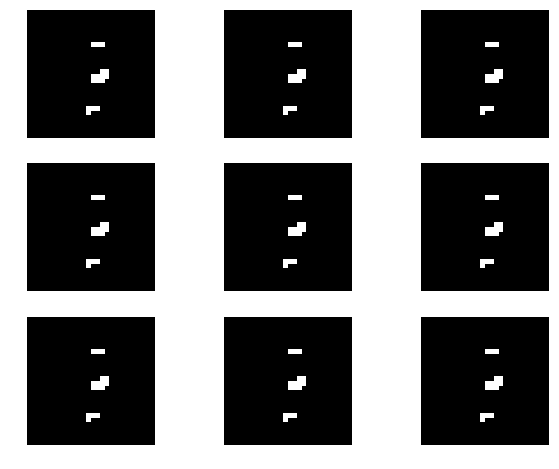

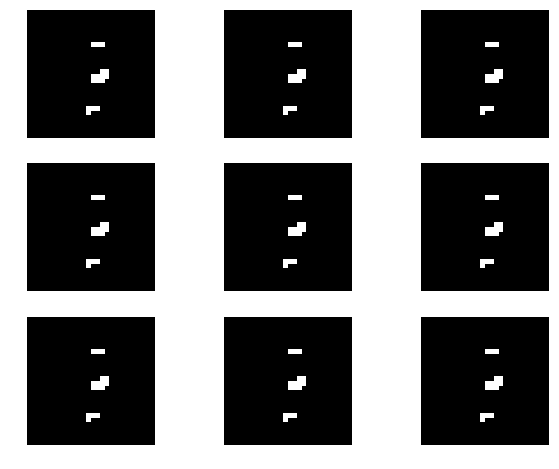

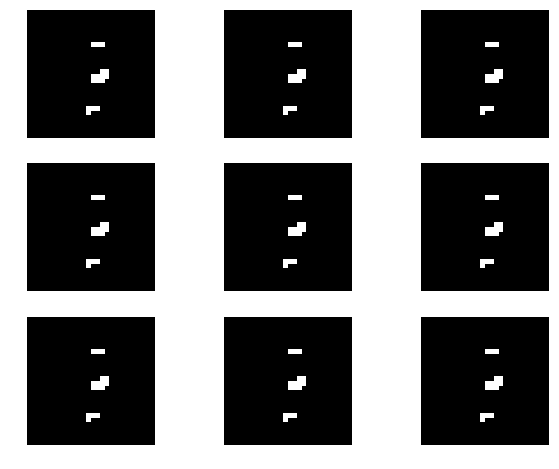

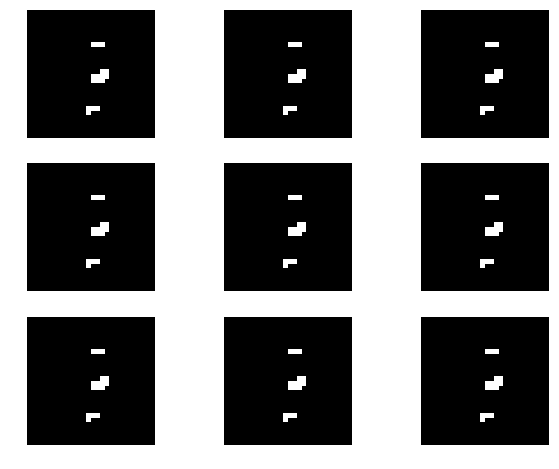

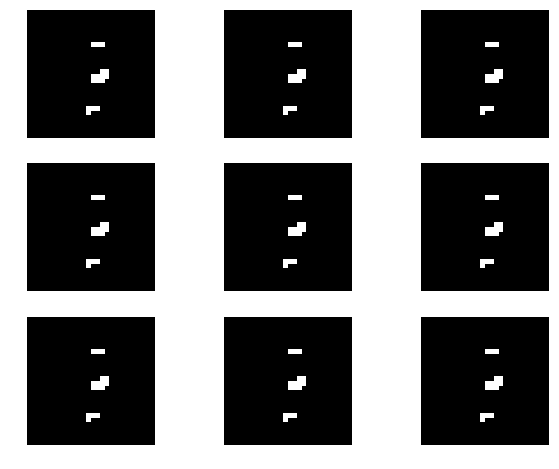

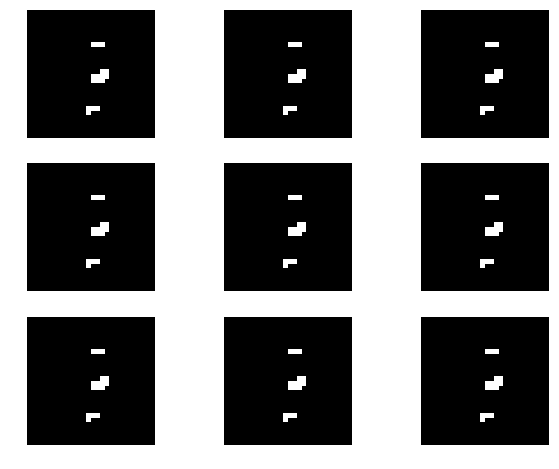

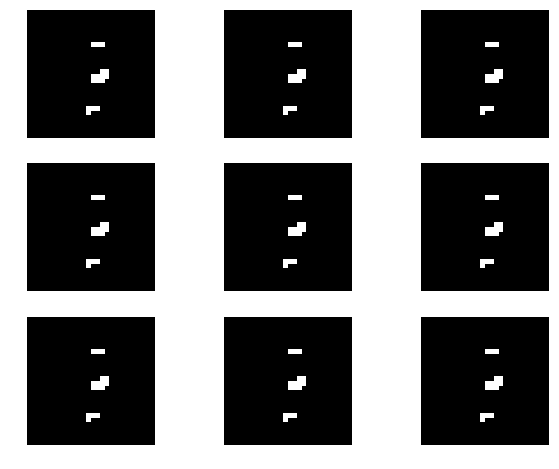

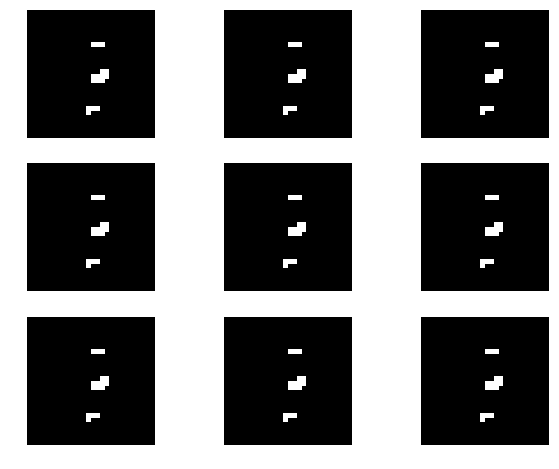

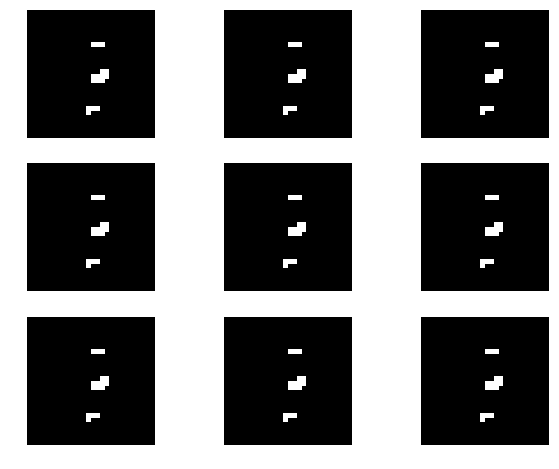

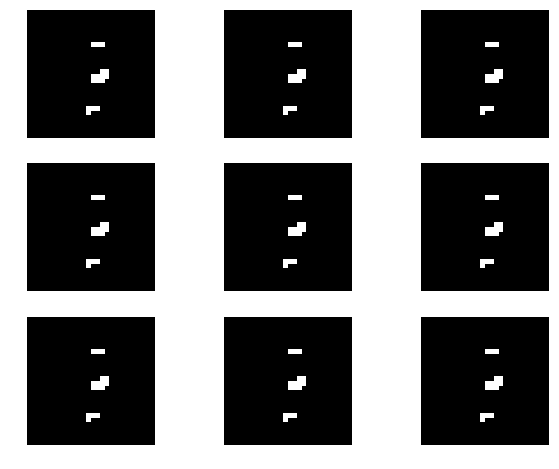

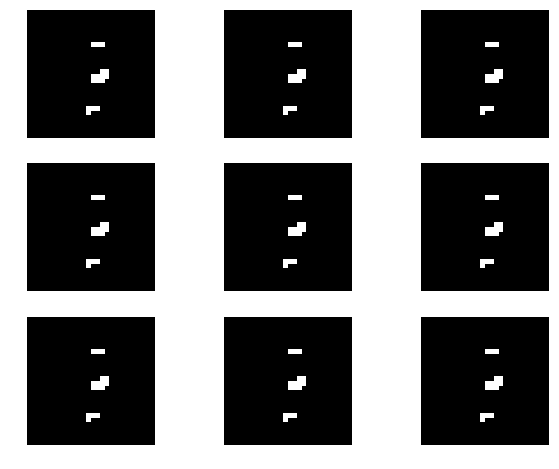

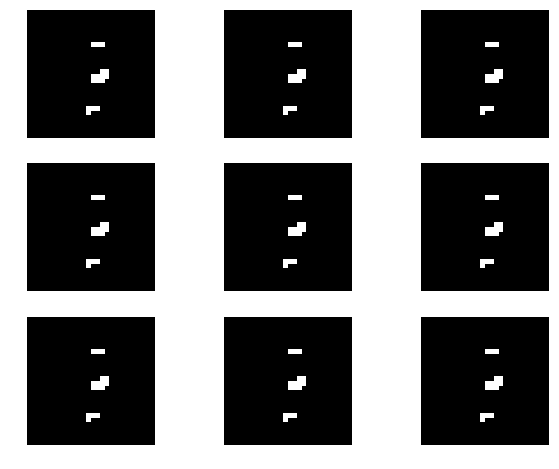

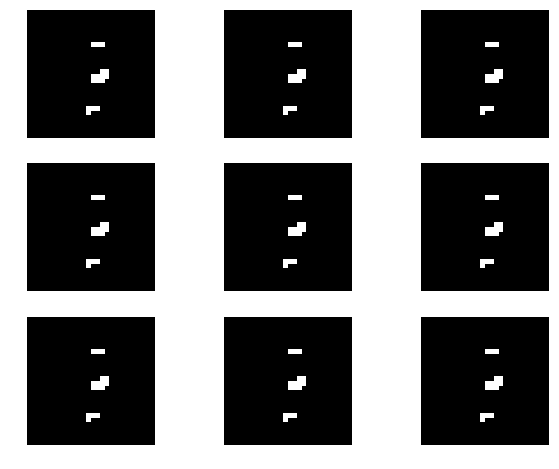

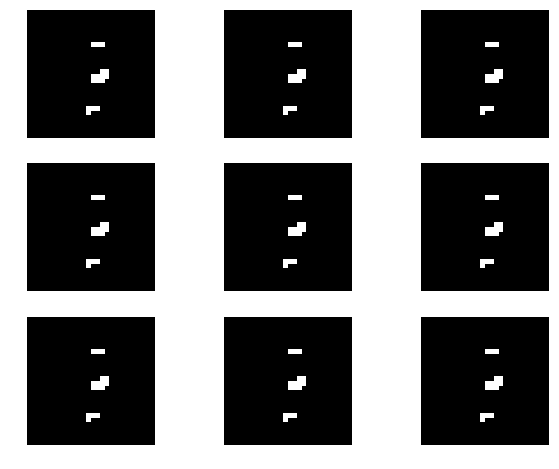

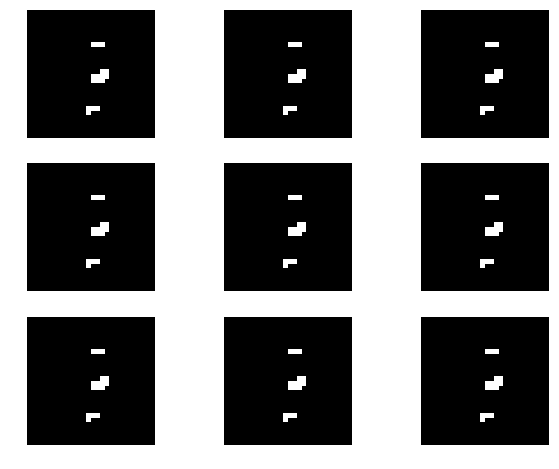

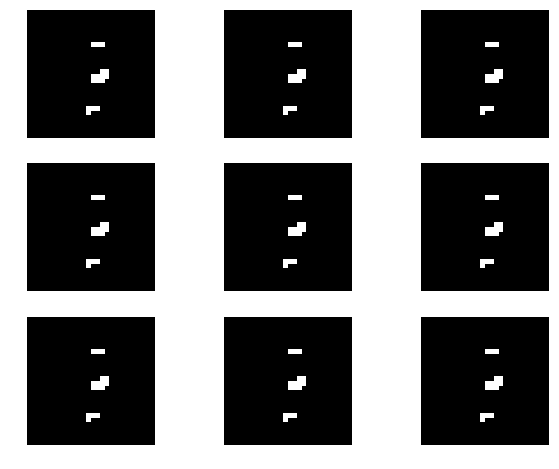

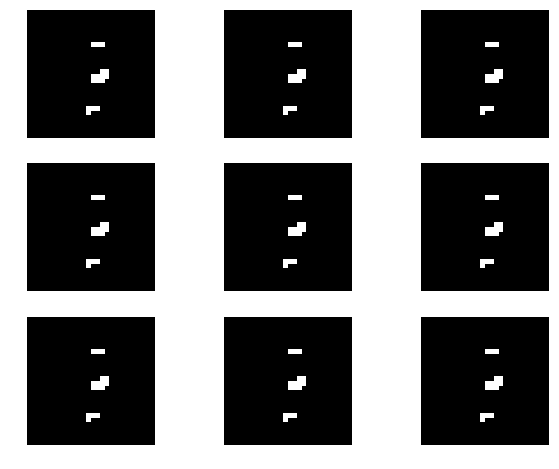

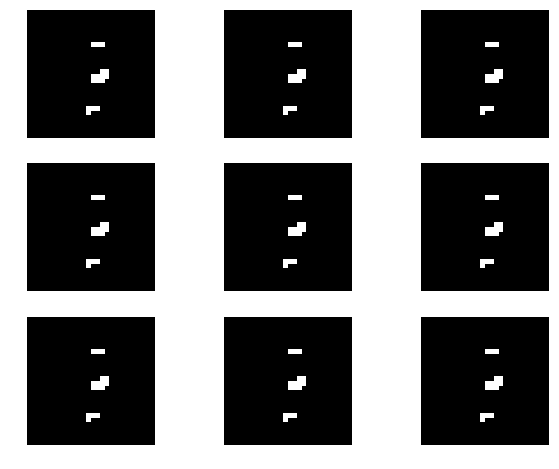

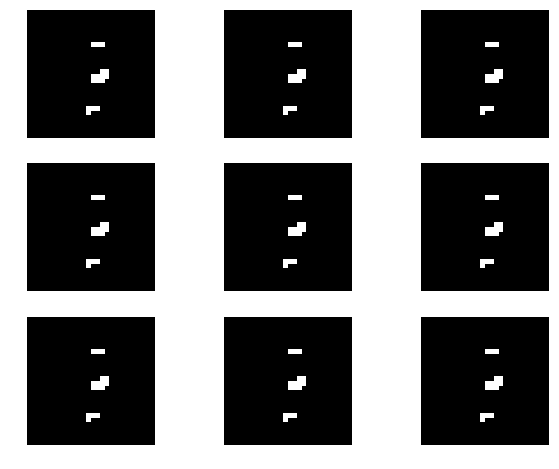

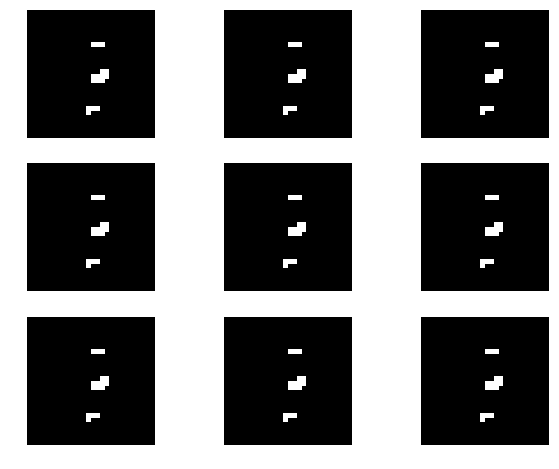

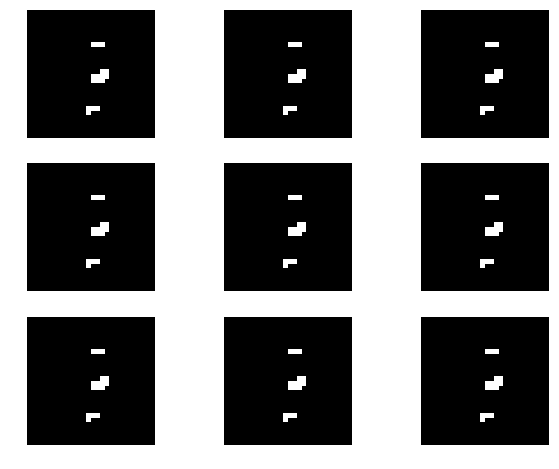

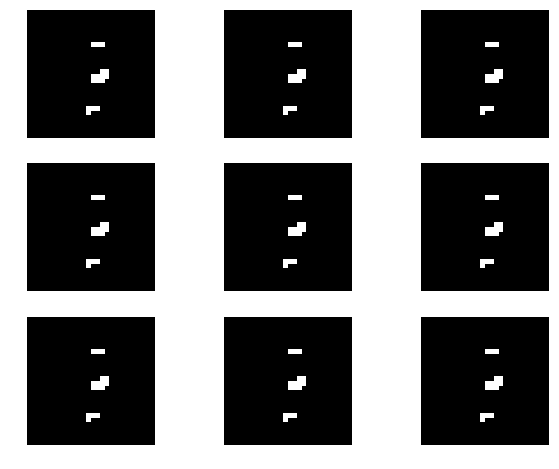

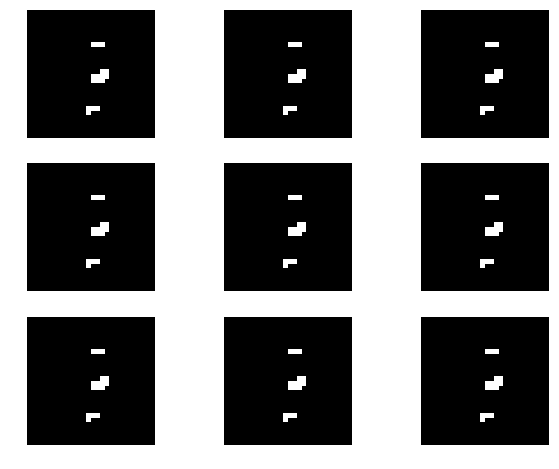

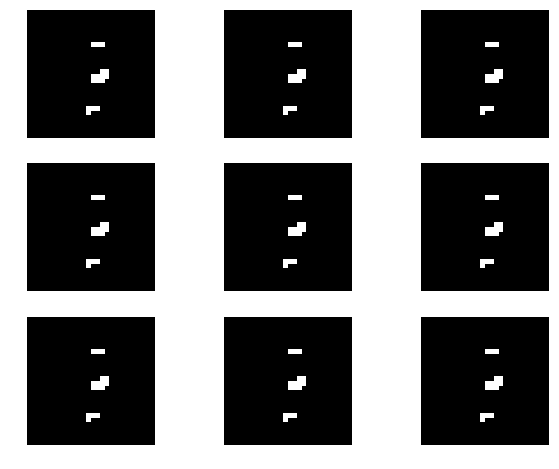

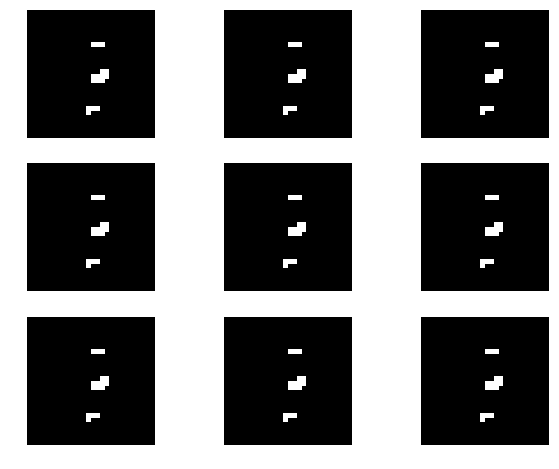

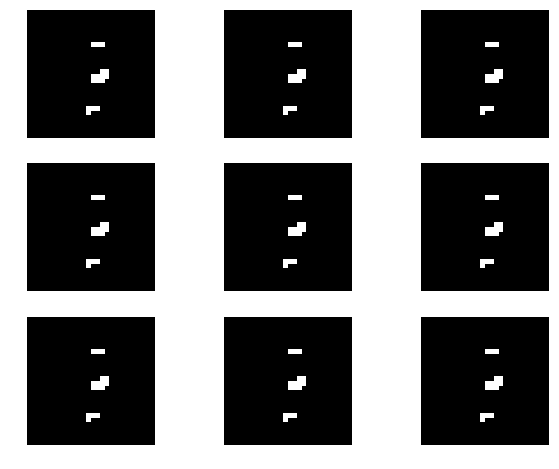

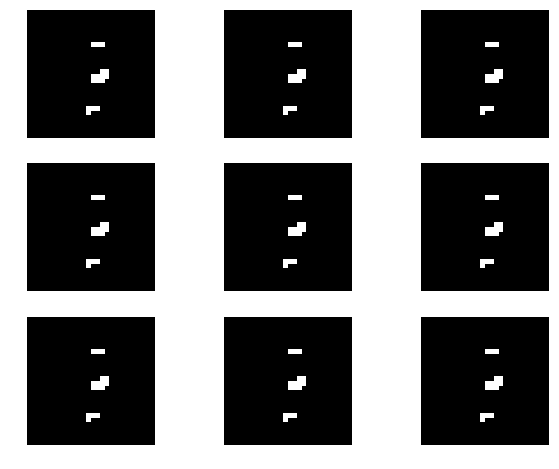

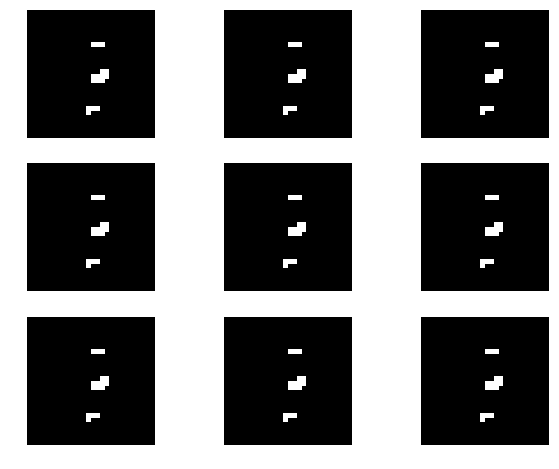

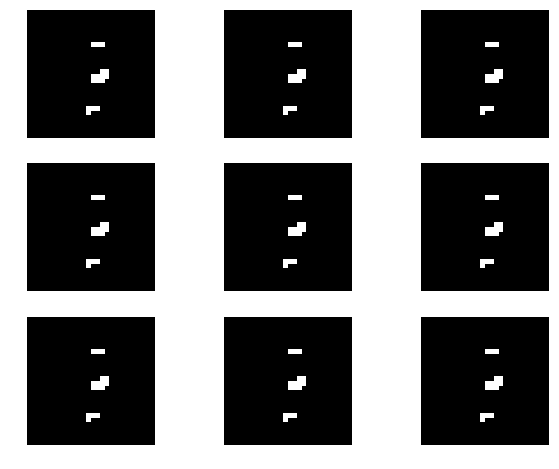

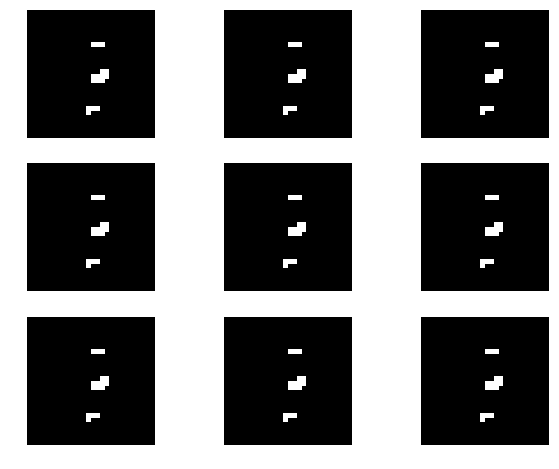

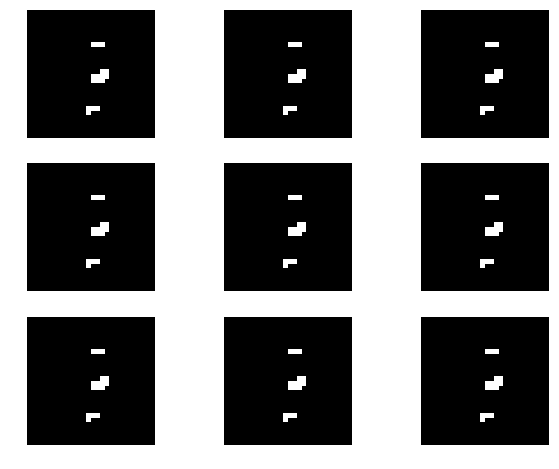

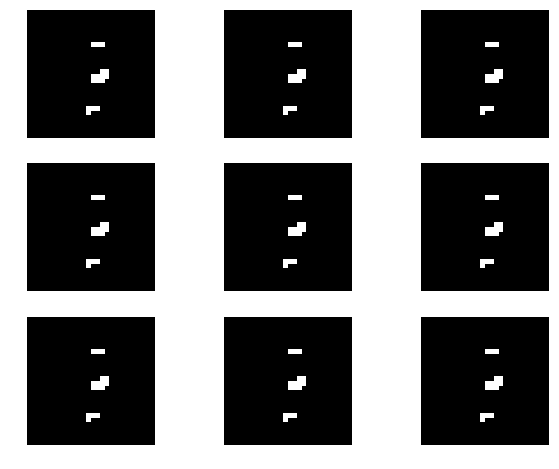

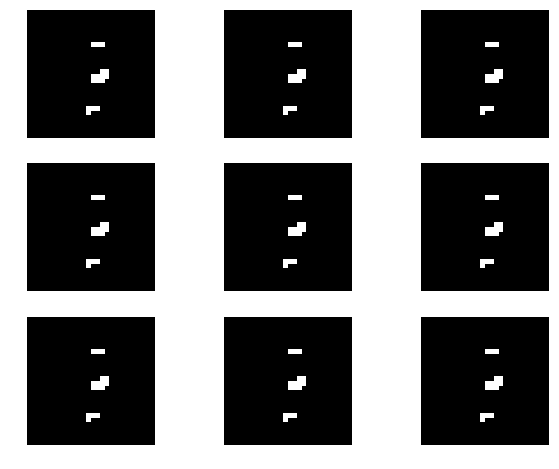

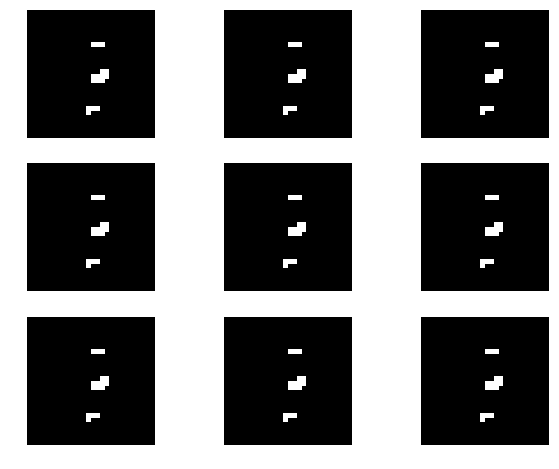

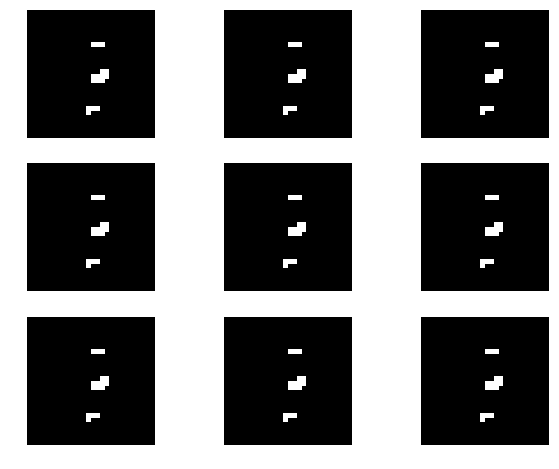

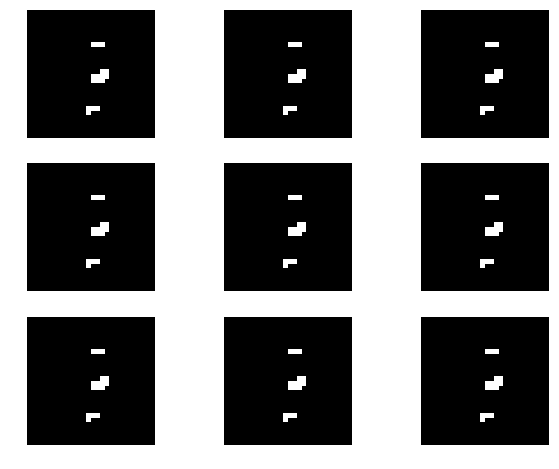

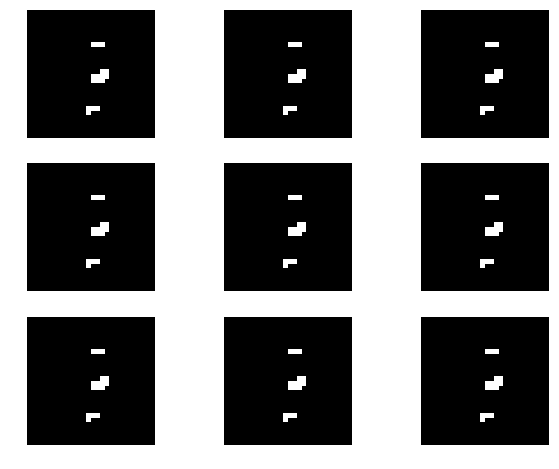

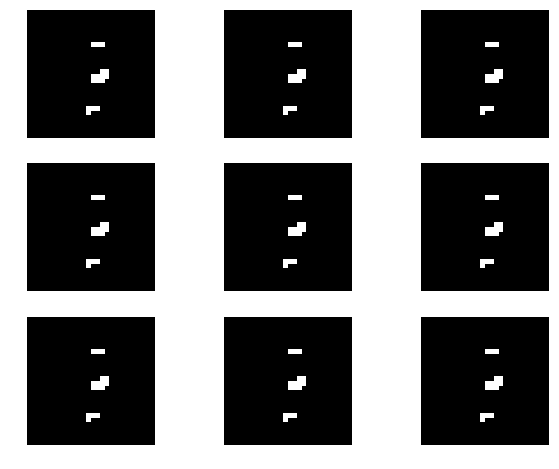

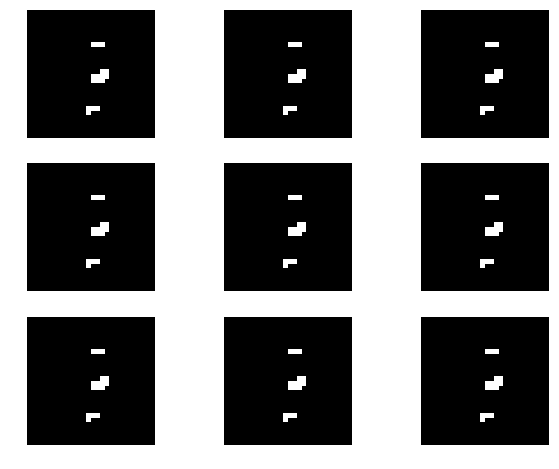

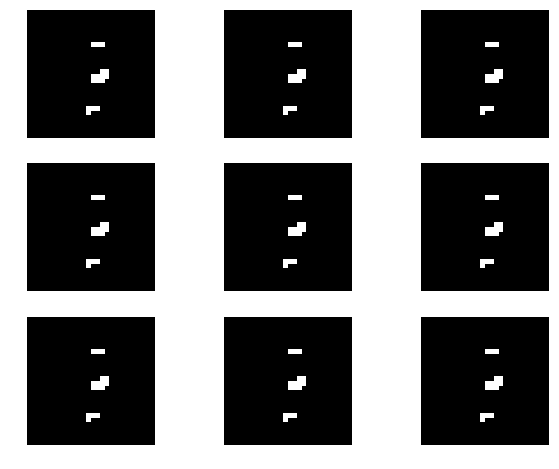

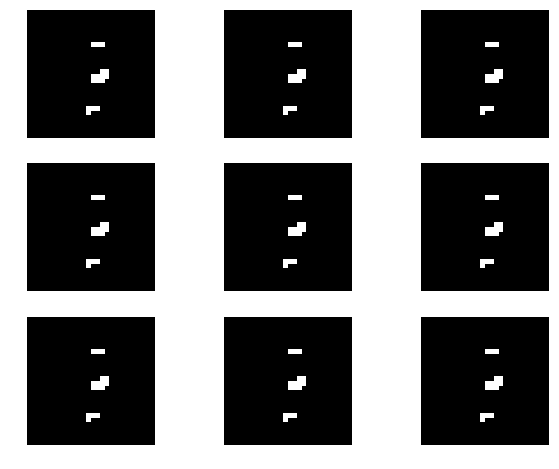

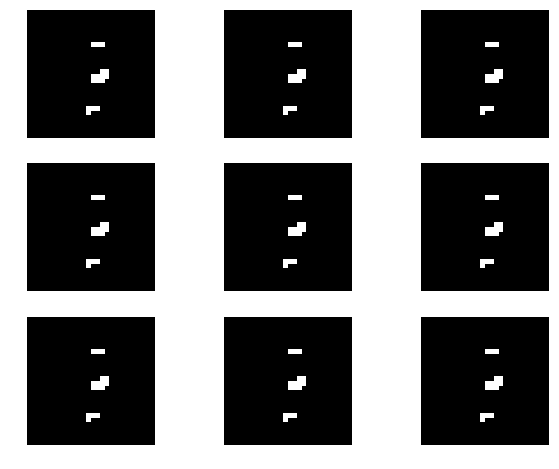

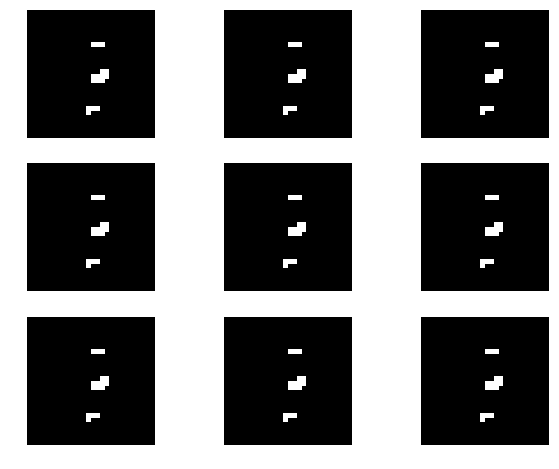

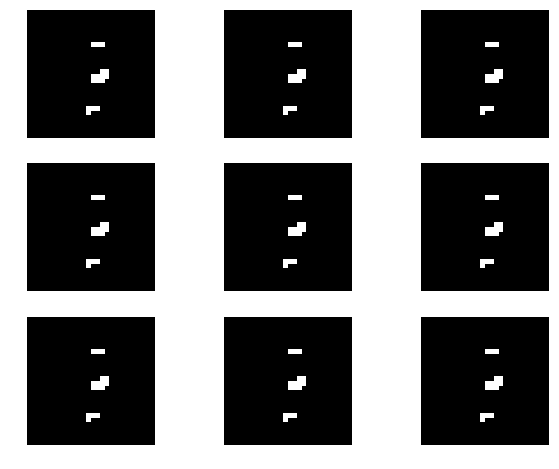

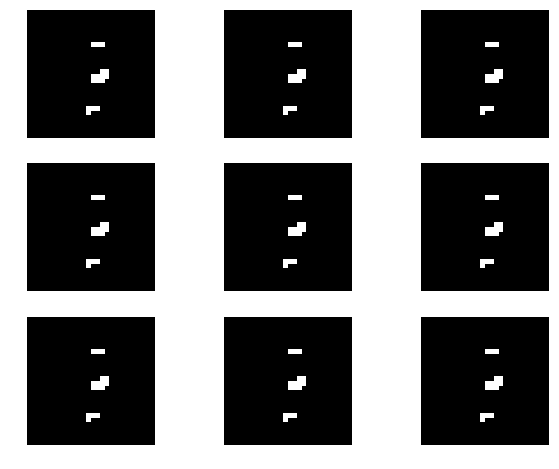

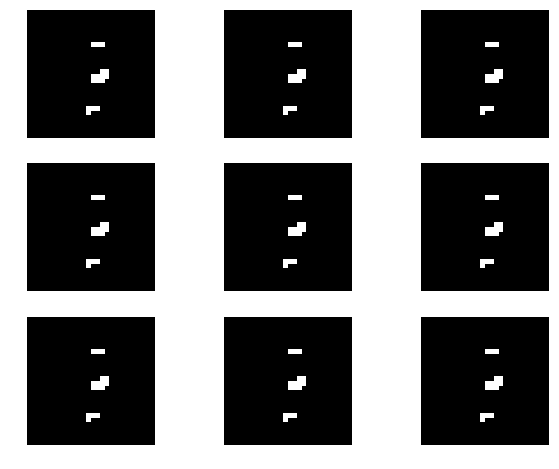

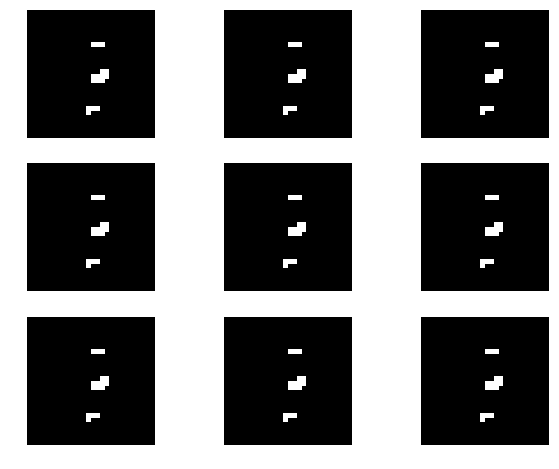

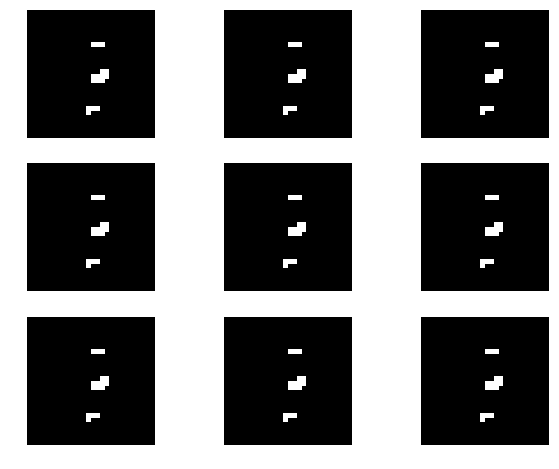

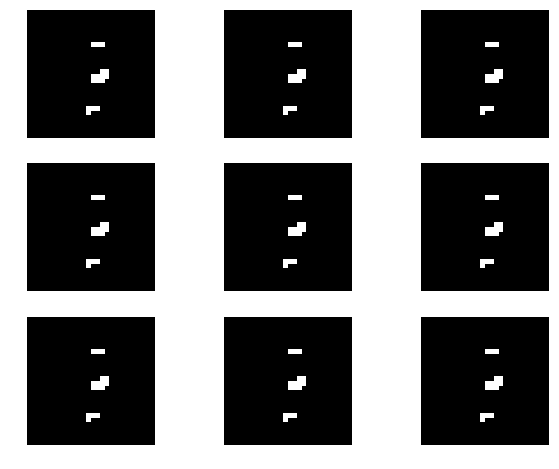

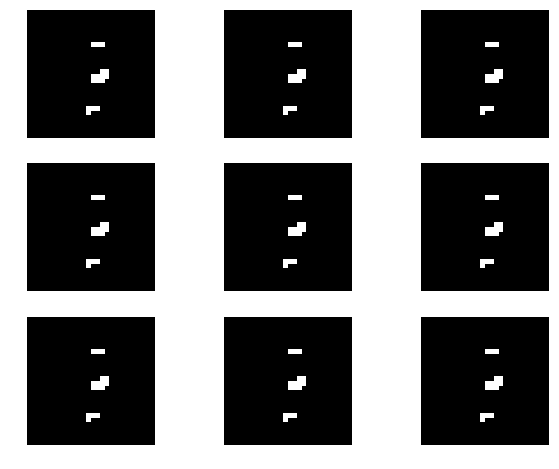

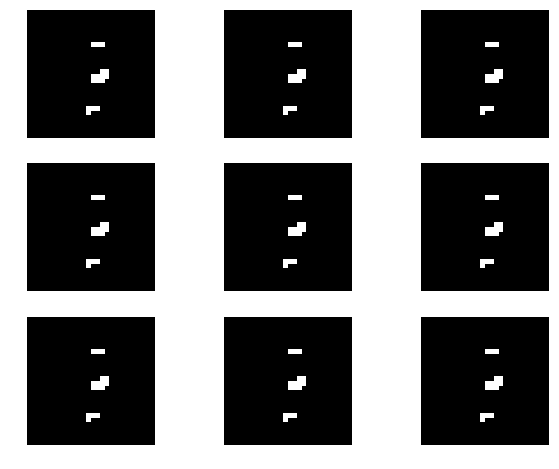

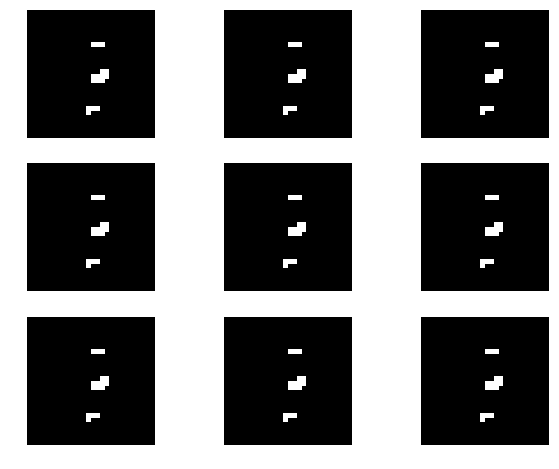

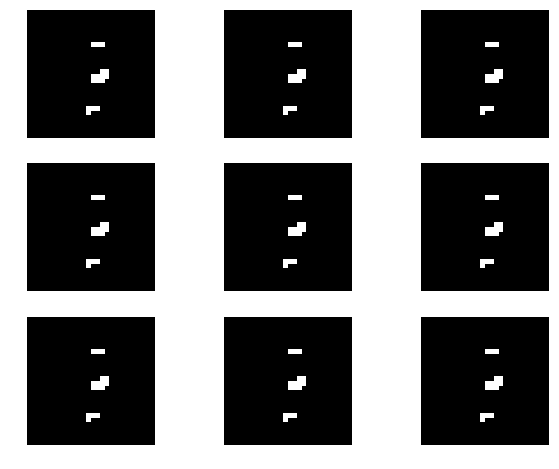

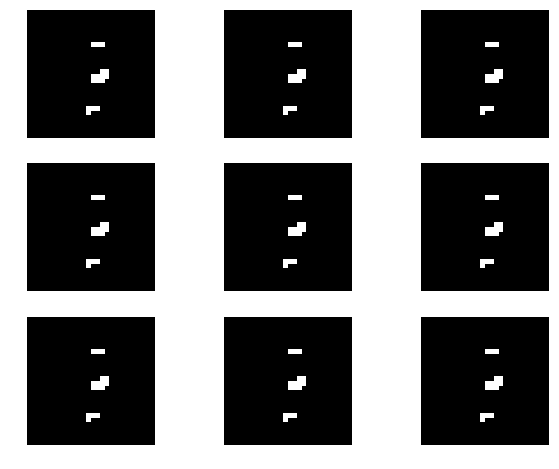

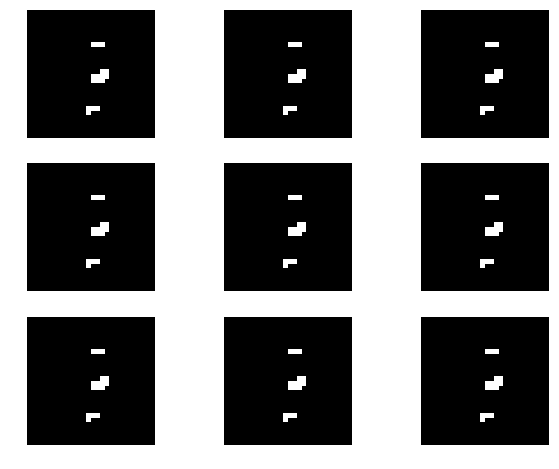

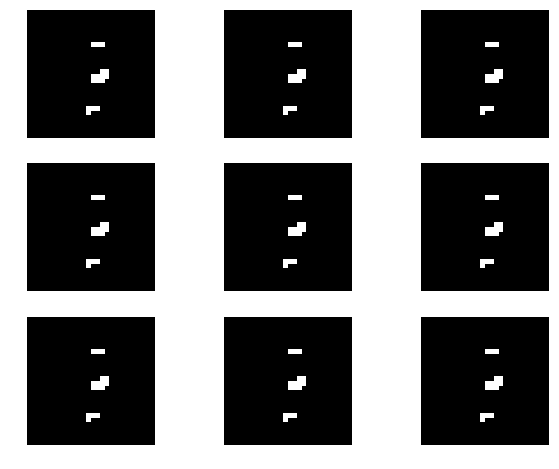

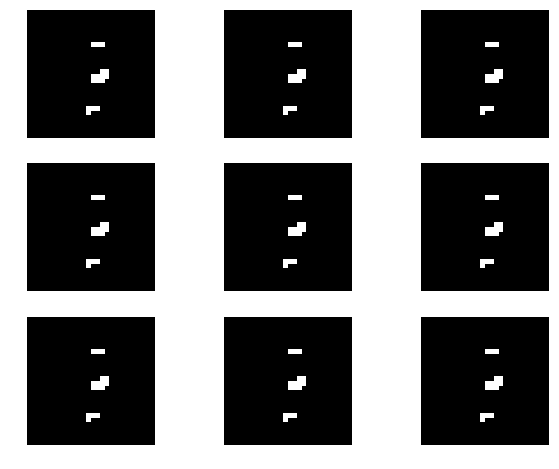

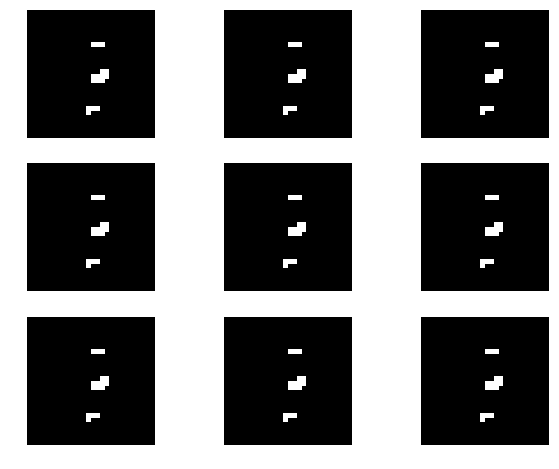

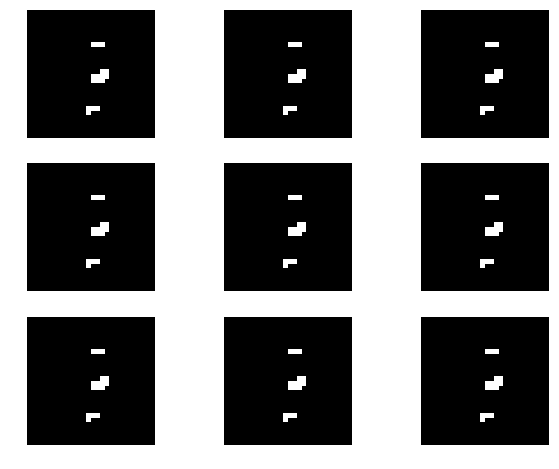

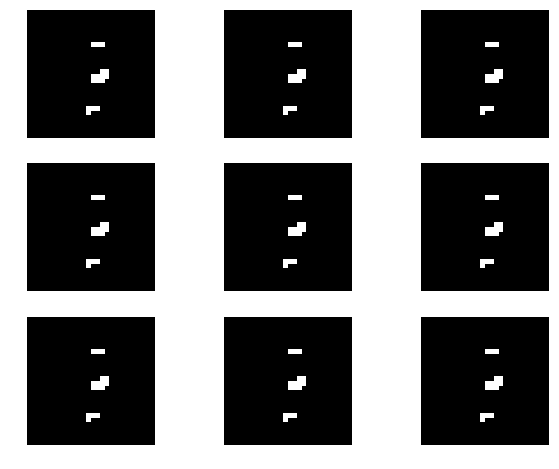

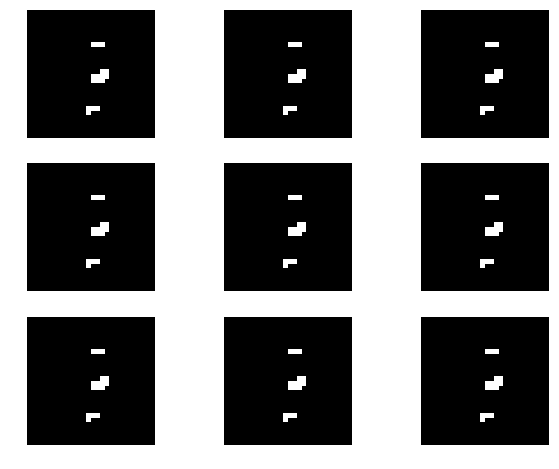

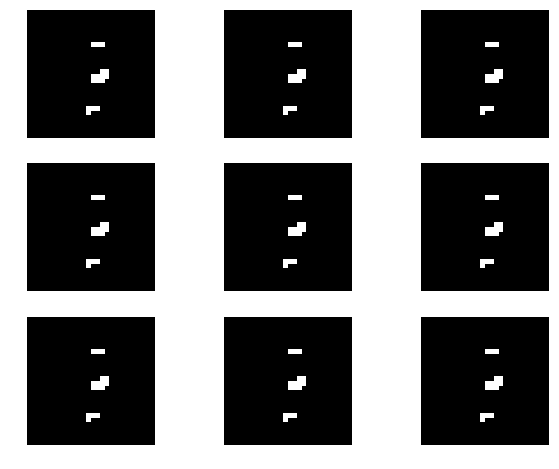

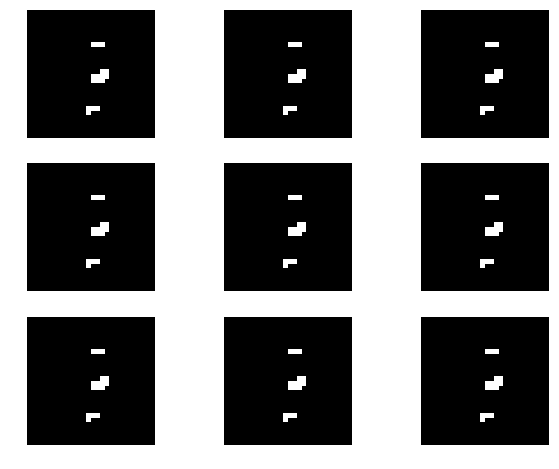

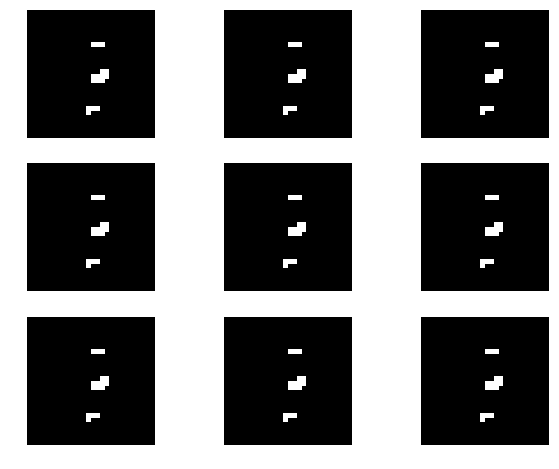

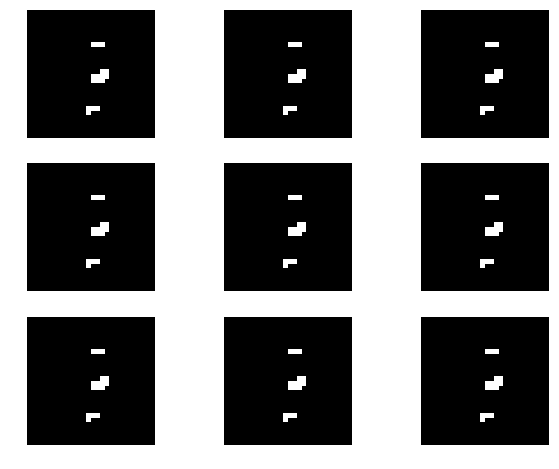

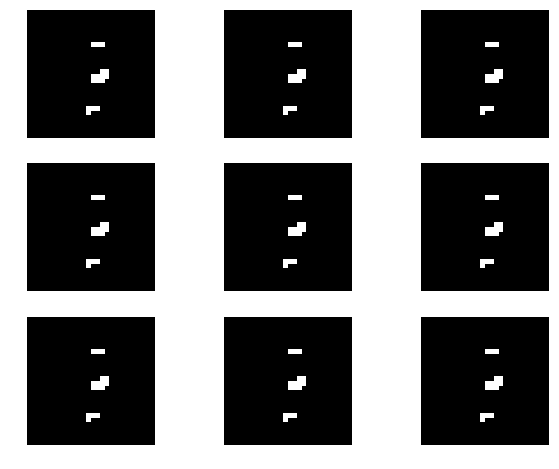

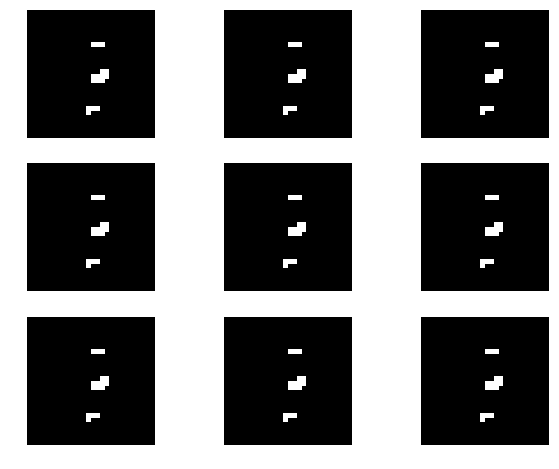

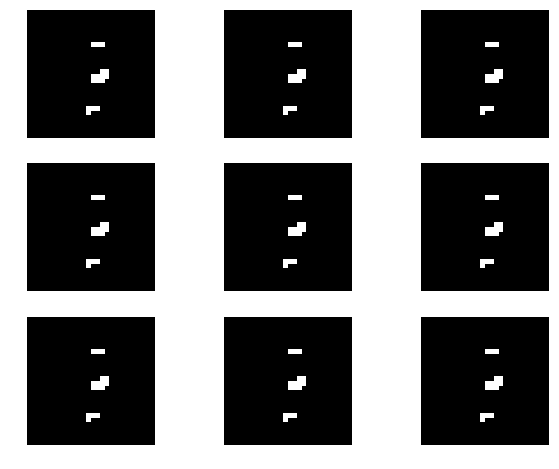

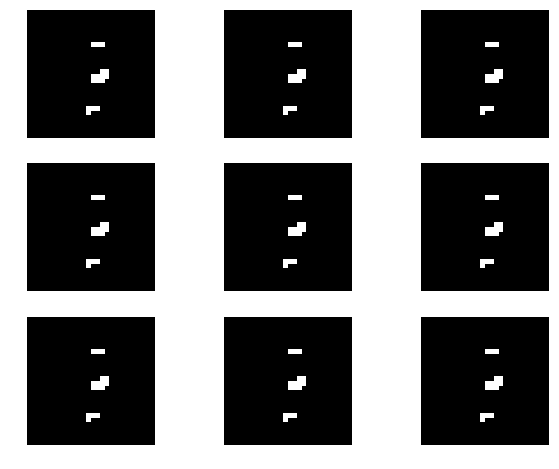

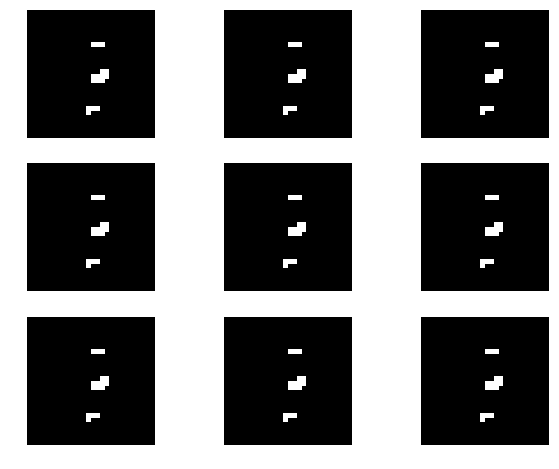

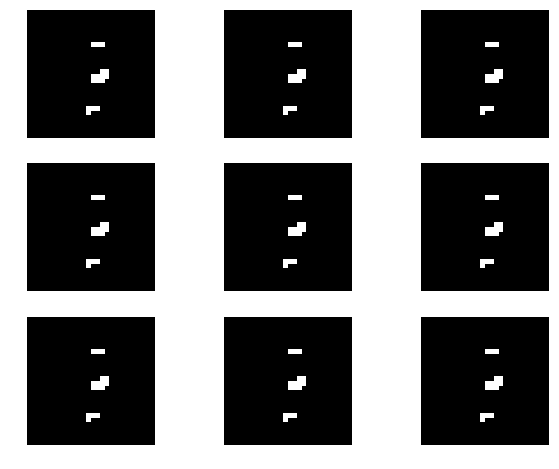

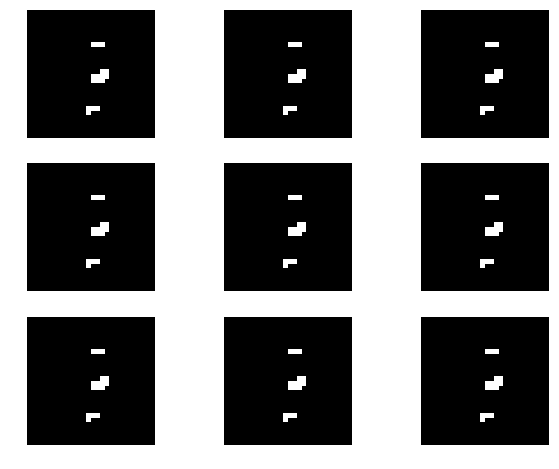

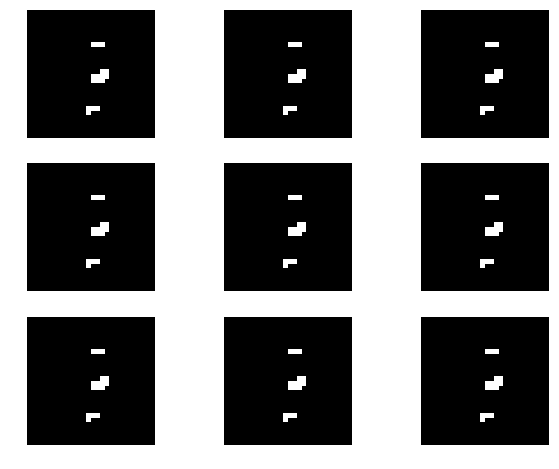

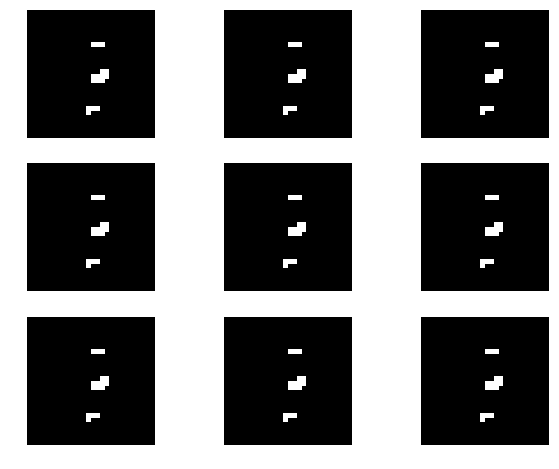

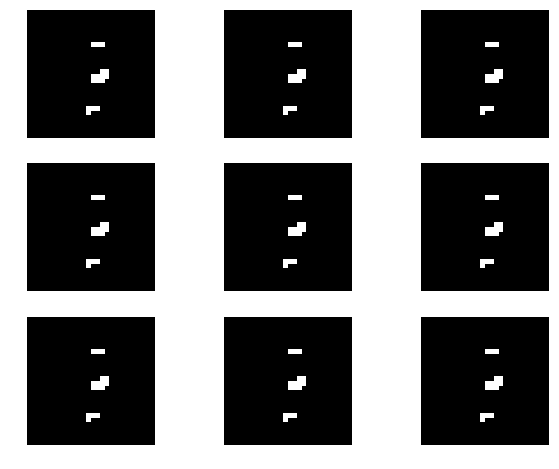

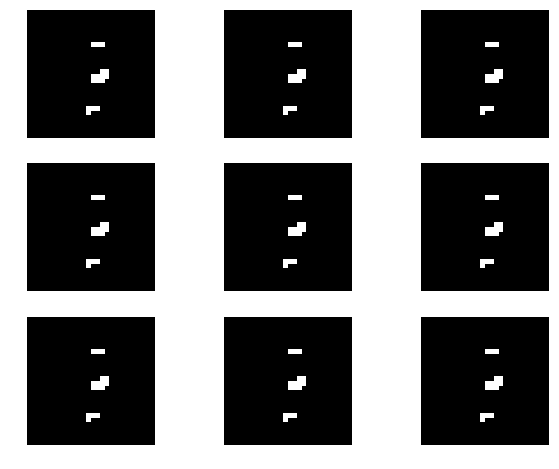

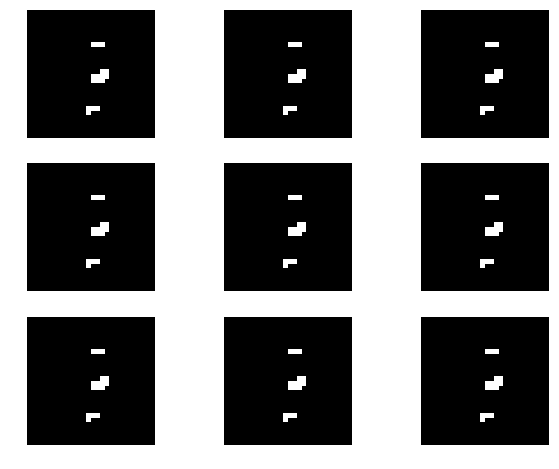

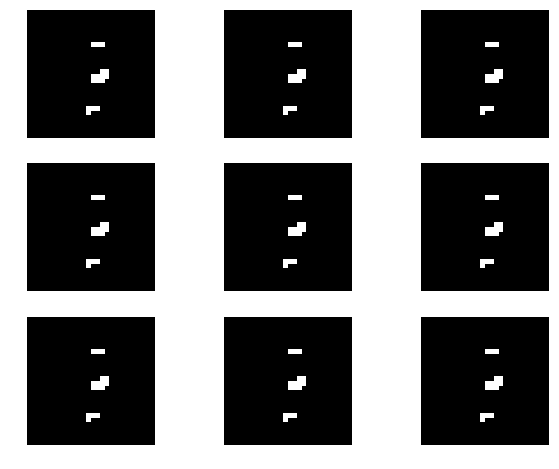

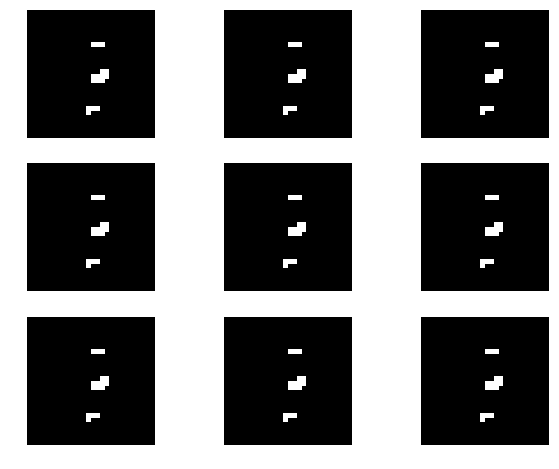

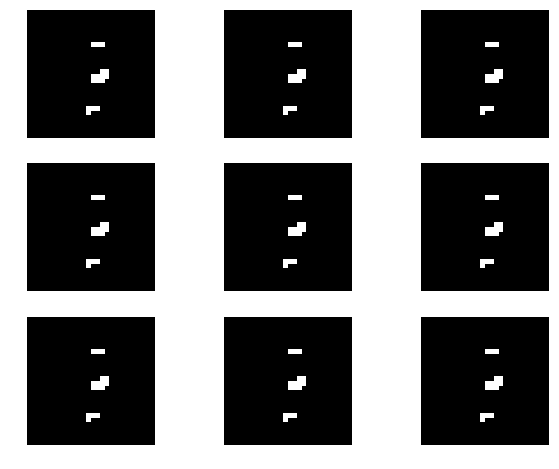

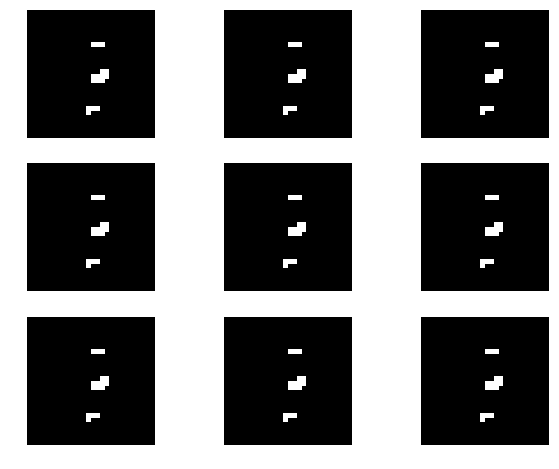

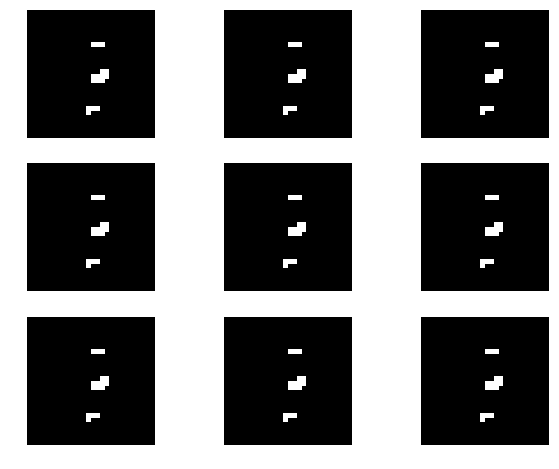

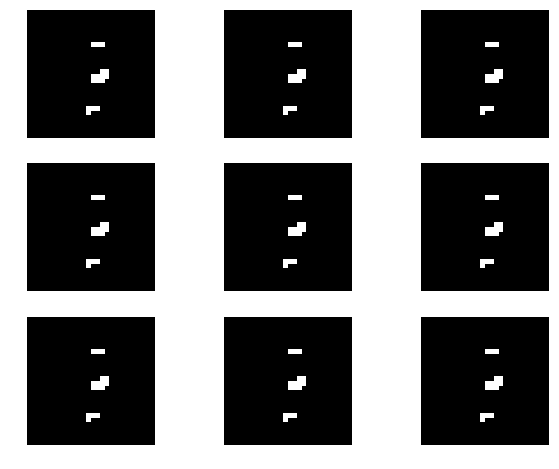

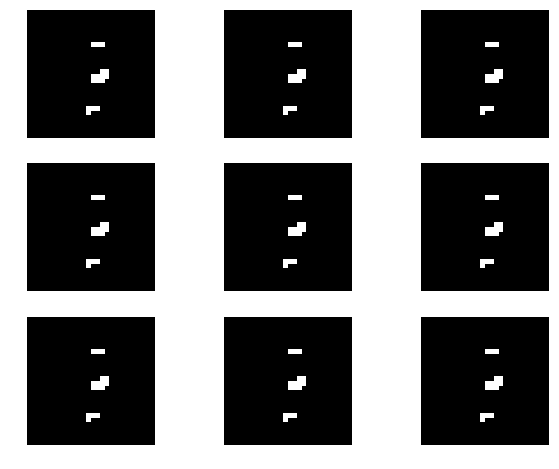

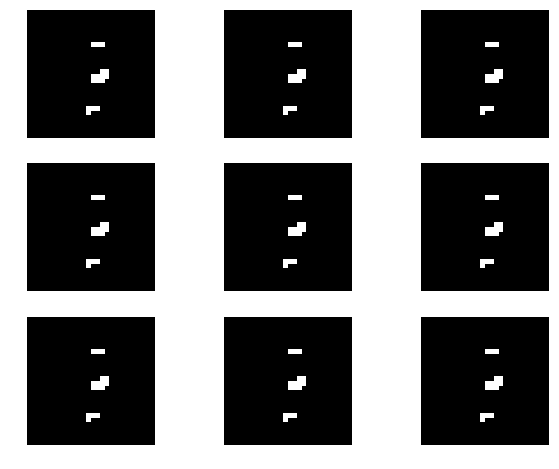

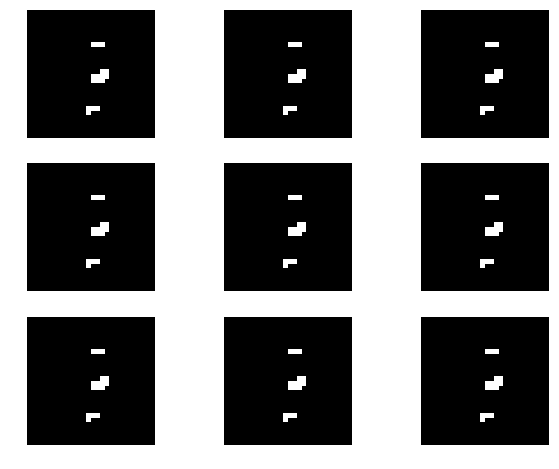

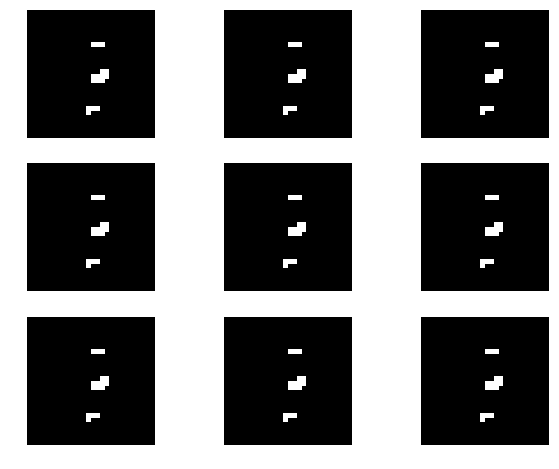

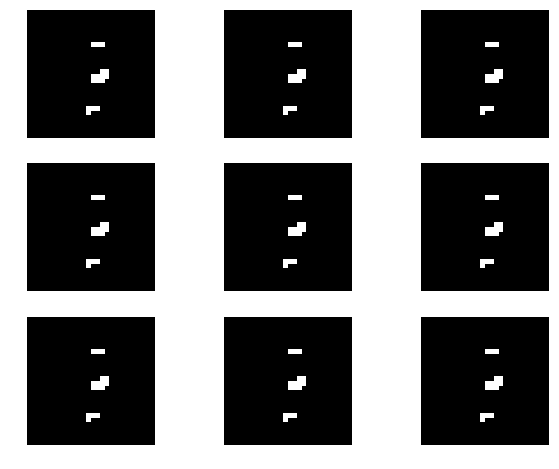

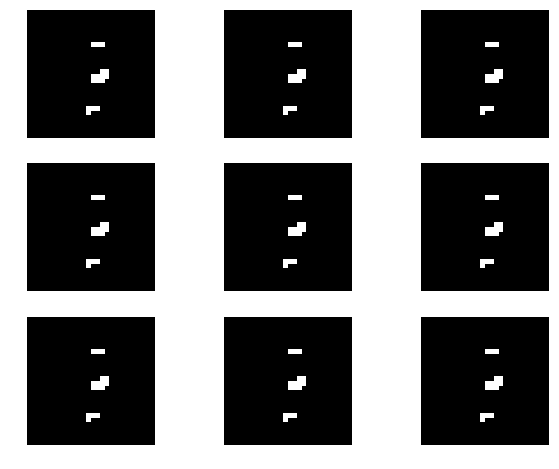

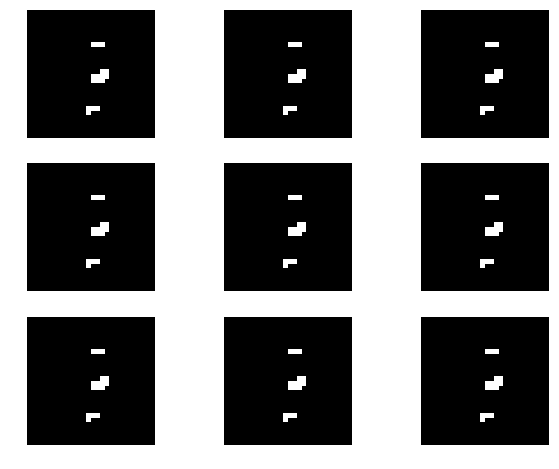

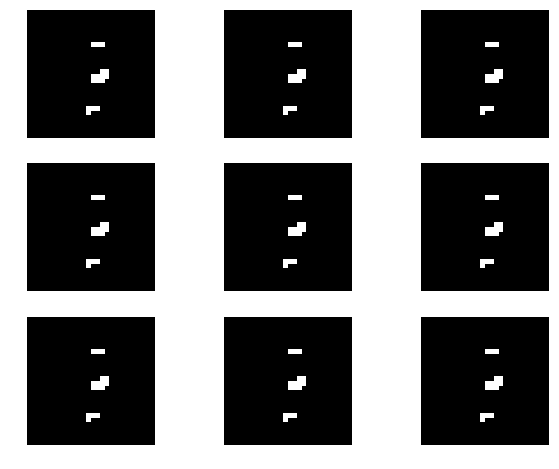

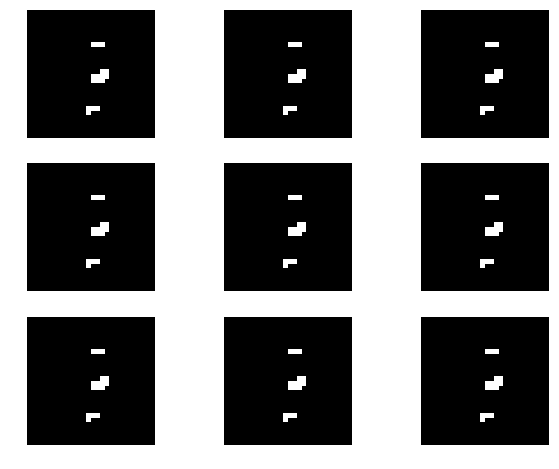

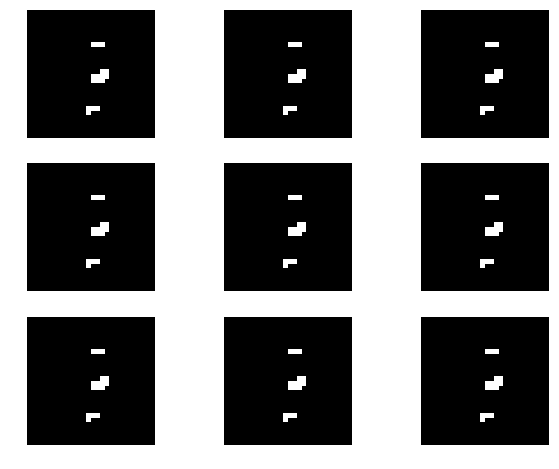

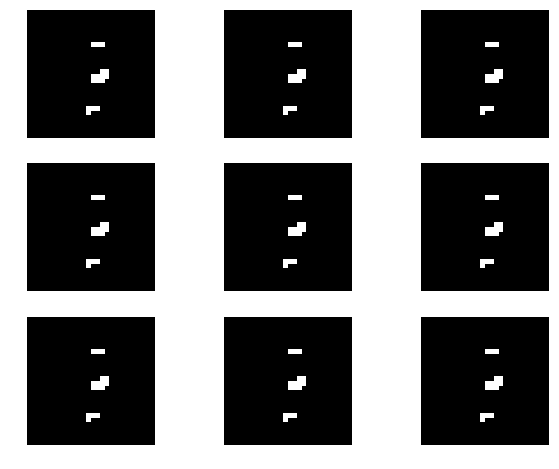

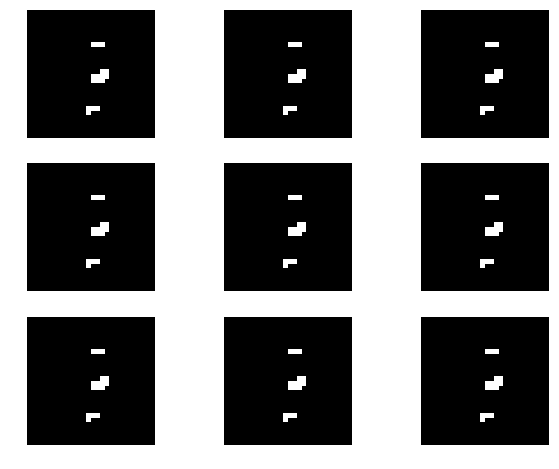

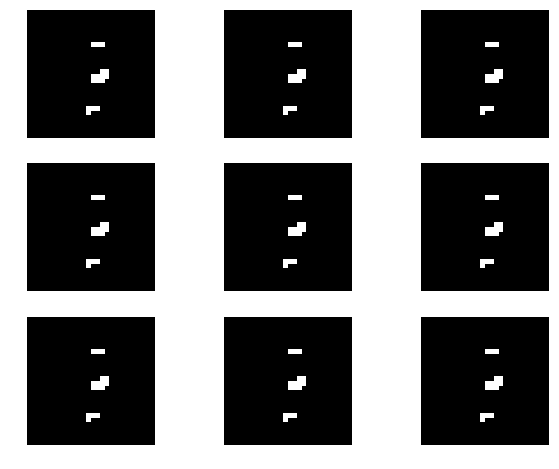

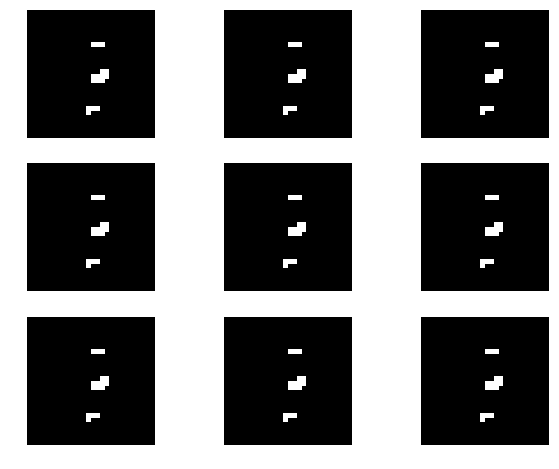

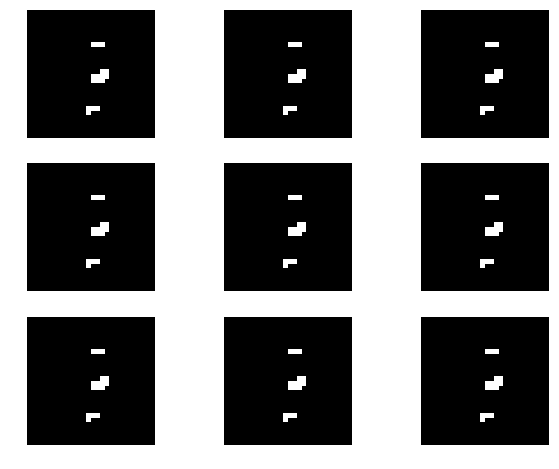

<class 'IndexError'>: index 21 is out of bounds for dimension 0 with size 21

In [9]:
loss_d = torch.zeros(int(num_epochs / 10)+1)
loss_g = torch.zeros(int(num_epochs / 10)+1)

for epoch in range(num_epochs):
    print('Epoch %d' %epoch)
    for n, (real_samples, _) in enumerate(train_loader):
        # First, train the discriminator 
        # Define the real data
        label_real = torch.ones((real_samples.shape[0],1))
        # Then, generate the fake data
        Z = torch.rand((real_samples.shape[0],z_dim))
        fake_samples = generator(Z).detach()
        label_fake = torch.zeros((real_samples.shape[0],1))
        # Concatenate the real and fake data into a large training set 
        samples = torch.cat((real_samples,fake_samples))
        labels = torch.cat((label_real,label_fake))
        # Train the discriminator on this set
        discriminator.zero_grad()
        output_discriminator = discriminator(samples)
        loss_discriminator= loss_function(output_discriminator,labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        # And now, train the generator
        generator.zero_grad()
        label = torch.ones((real_samples.shape[0],1)) # the generator wants the discriminator to label the generated samples as real
        Z = torch.rand((real_samples.shape[0],z_dim))
        generated_samples = generator(Z)
        outputs = discriminator(generated_samples) #pass the fake batch in the just-trained discriminator
        loss_generator = loss_function(outputs,label)
        loss_generator.backward()
        optimizer_generator.step()
    # Show loss and performance every sample_interval epoch
    #if epoch % sample_interval == 0: #and n == batch_size - 1:
    loss_d[int(epoch / sample_interval)] = loss_discriminator
    loss_g[int(epoch / sample_interval)] = loss_generator
    print('Discriminator loss',loss_discriminator )
    print('Generator loss',loss_generator )
    plt.figure(1,figsize=(10,8))
    plt.plot(loss_d.detach())
    plt.plot(loss_g.detach())
    plt.legend('Discriminator','Generator')
    plt.title('Evolution of the losses')
    plt.draw()
    # Show some generated samples computed at this epoch
    images_to_show = generator(Z_examples)
    images_to_show = 0.5*images_to_show.detach().squeeze()+0.5 # just a small rescaling
    plt.figure(figsize=(10,8))
    plt.title('Evolution of the generated samples')
    for cnt in range(1,rows*cols+1):
        plt.subplot(rows,cols,cnt)
        plt.imshow(images_to_show[cnt-1,:,:],cmap = 'gray')
        plt.axis('off')
        cnt+=1
    plt.draw()

In [24]:
print(128*28*28/2)
print(28*28)

50176.0
784


In [9]:
Z_examples = torch.zeros(rows*cols,z_dim)
for ii in range(rows*cols):
    Z_examples[ii,np.random.randint(0,99)] = 1
    
images_to_show = generator(Z_examples)
images_to_show = 0.5*images_to_show.detach().squeeze()+0.5
print(images_to_show[0,:,:])
plt.figure()
cnt = 0
for ii in range(3):
    for jj in range(3):
        print(cnt)
        plt.subplot(3,3,cnt+1)
        plt.imshow(images_to_show[cnt,:,:],cmap = 'gray')
        plt.axis('off')
        cnt+=1
plt.show()

<class 'IndexError'>: index 19 is out of bounds for dimension 1 with size 10